In [3]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [4]:
%pwd
%cd ir_data/GL-05-52

[WinError 3] The system cannot find the path specified: 'ir_data/GL-05-52'
C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-05-52


### Fully Analyse Data

Inputs seem good: IR Datapoints =  40 , Number of conditions =  40


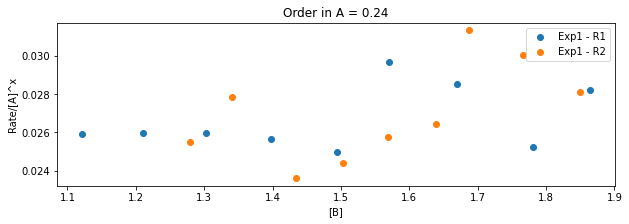

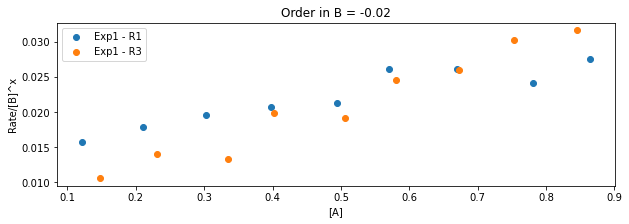

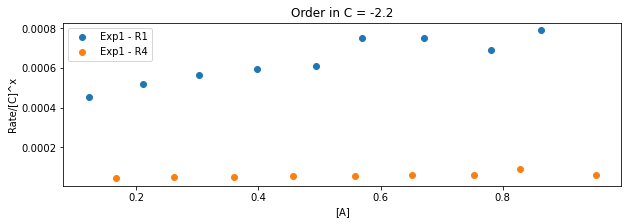

In [6]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Instantiate class
peaks = Peaks(ir_data)

# Determine the peak prominences of a single wavelength
processed_ir_data = peaks.prominence(0.032,'Peak at 1704 cm-1')

# Read experimental conditions
Conditions()
experimental_data = Conditions.read(processed_ir_data)

# Create spka profiles
spka = SPKA(experimental_data)
spka_data = spka.spka('[A]0')

# Perform RPKA
rpka = RPKA(spka_data)
rpka_data = rpka.diff_excess()

In [11]:
# Set up excelwriter
writer = pd.ExcelWriter('Processed.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
rpka_data.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
writer.save()

# This won't work if the excel file is open